In [1]:
import matplotlib.pyplot as plt
import flowx
from qiskit.visualization import plot_histogram

In [2]:
nx, ny = 1, 1
xmin, xmax = -1, 1
ymin, ymax = -1, 1

particle_info = [dict(input='HDF5', file='sm_crown.h5', vel = [0.0,0.0]),
                 dict(input='list', x = [[0.0, 0.],
                                         [0.8, 0.],
                                         [-0.4, 0.0],
                                         [0.8, -0.8]])]

quantum_info = dict(simulator = 'QASM', qubits = 4, repeat = 3)

gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax, 
                                                                   particle_info=particle_info)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

grover = flowx.quantum_main(domain_data_struct, quantum_info=quantum_info)

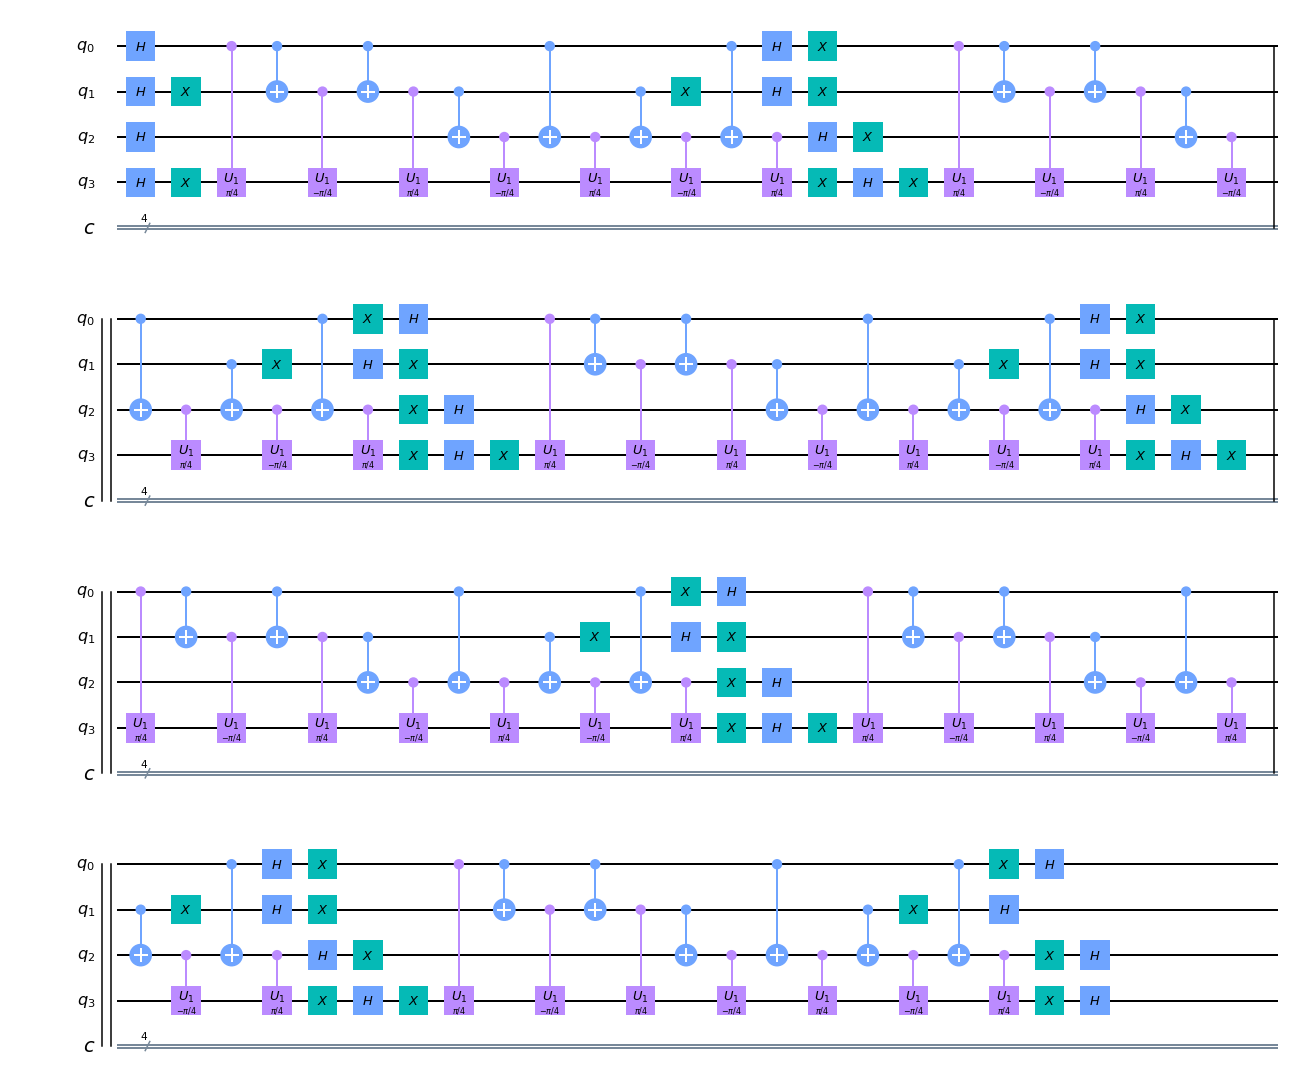

In [3]:
grover.setup_circuit()
grover.circuit.draw(output="mpl")

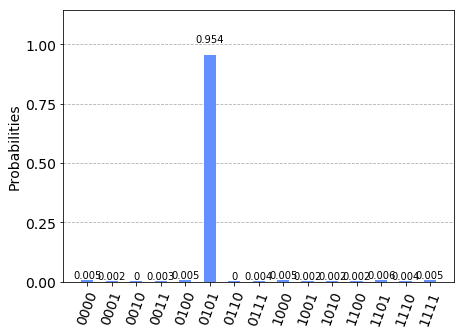

In [4]:
results, answer = grover.run_circuit()
plot_histogram(answer)

In [5]:
particle_info[1]['x']

[[0.0, 0.0], [0.8, 0.0], [-0.4, 0.0], [0.8, -0.8]]

(-0.7224976109660846,
 0.885911042292799,
 -0.8552327670972559,
 0.241280194365823)

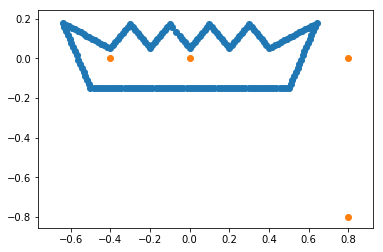

In [6]:
plt.scatter(particles[0].x[1:,0], particles[0].x[1:,1])
plt.scatter(particles[1].x[:,0], particles[1].x[:,1])
plt.axis('equal')